## Summary

This is a case study for *Bellabeat* - a high-tech design and manufacturing company that produces health-focused smart devices for women. The Scenario is, Myself as Junior Data Analyst, the goal of this project is to provide an analysis of how consumers are using their smart devices. The insights gained from the analysis will then hopefully contribute to Bellabeat's marketing team as required by the case study.
  
## Target Audience
  
  Female users to improve their health 
  
## Key Stakeholders
  
  * Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
  * Sando Mur: Mathematician and Bellabeat’s cofounder; 
  * key member of the Bellabeat executive team
  
## Business Task
  
  * Analyze smart device usage data in order to gain
    insight into how people are already using their       smart devices.
  
*Throughout the project, I will be following the 6 stages :* **Ask,Prepare,Process,Analyze,Share,Act**

## Stage 1 : ASK
  
  * How consumers use non-Bellabeat smart devices?
  * How could the insights I gain, help influence Bellabeat marketing strategy?

**Deliverable:**
  
*      Insights on the trends in smart device usage
*      Use insights above to give recommendation on Bellabeat marketing strategy
   
   
## Stage 2 : PREPARE

     The data I am analyzing are FitBit Fitness Tracker Data made and available through         Mobius.
    
**Does the data ROCC?**

  * **Reliable** : Reliablity is low. Only 30 people and 1 month is not representative. 
  * **Original** : The data is not original or from internal. The Data was hosted by Mobius on Kaggle. 
  * **Comprehensive** : A Very small sample, which lacks even the category **Gender**
  * **Current** : Data is not the current, Its a 6 year old data.
  * **Cited** : Yes and Low.
  
**How to address licensing, privacy, security, and accessibility?**

  * License: CC0: Public Domain 

**Are there any problems with the data?**

  * Data was collected between 03.12.2016-05.12.2016,     out of date.
  * Corona changes the life style of people all over      the world. However, this dataset does not include    data during corona time.
  * Data just include March to May, no data from other     seasons, like summer, autumn, winter.
  * Data set just include customers of FitBit Fitness     Tracker, no other smart device users.
  * Bellabeat focuses on female users. However, this      dataset does not include sex information of the       users.
  * The dataset just includes 30 users, definitely can     not reflect the overall population.


# Step 3 : Data Cleaning - PROCESS



In [1]:
# Setting up the environment
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Importing the dataset**

In [3]:
#Importing datasets
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)




> There are 940 rows and 15 columns in the daily activity dataset. Lets use skimr 

In [4]:
library(skimr)
skim_without_charts(daily_activity)

── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

In [5]:
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  Calories = col_double()
)




In [6]:
skim_without_charts(daily_calories)

── Data Summary ────────────────────────
                           Values        
Name                       daily_calories
Number of rows             940           
Number of columns          3             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  2             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDay           0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4855407369. 2424805476. 1503960366
2 Calories              0             1       2304.        718.      

In [7]:
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
skim_without_charts(daily_steps)


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  StepTotal = col_double()
)




── Data Summary ────────────────────────
                           Values     
Name                       daily_steps
Number of rows             940        
Number of columns          3          
_______________________               
Column type frequency:                
  character                1          
  numeric                  2          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDay           0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4855407369. 2424805476. 1503960366
2 StepTotal             0             1       7638.       5087.          0
          p25         p5

In [8]:
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
skim_without_charts(hourly_calories)
skim_without_charts(hourly_steps)
skim_without_charts(sleep_day)


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  StepTotal = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)




── Data Summary ────────────────────────
                           Values         
Name                       hourly_calories
Number of rows             22099          
Number of columns          3              
_______________________                   
Column type frequency:                    
  character                1              
  numeric                  2              
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityHour          0             1    19    21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 4848235270.  2422500401.  1503960366
2 Calories              0             1         97.4   

The about summary itself gives a info about the unique , missing mean and sd of each dataset.


**The Data needs be cleaned for accurate result.**

Since there are numerous column in daily activity lets make a table of selected column.


In [9]:
activity_cleaned <- daily_activity %>%
  select(Id, ActivityDate, TotalSteps, TotalDistance, VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes, SedentaryMinutes)
glimpse(activity_cleaned)

Rows: 940
Columns: 8
$ Id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ ActivityDate         <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016…
$ TotalSteps           <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15…
$ TotalDistance        <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6…
$ VeryActiveMinutes    <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41, 3…
$ FairlyActiveMinutes  <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, 5,…
$ LightlyActiveMinutes <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, 211,…
$ SedentaryMinutes     <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818, 83…


**From 15 columns we have chosen 8 column to continue our analysis further**

*In order to more easily look at the activity patterns, the columns for very active, fairly active, and lightly active minutes will be combined so it can later on be compared with the sedentary minutes.*

In [10]:
# Creating new column for total active minutes
activity_cleaned$TotalActiveMinutes <- rowSums(cbind(activity_cleaned$VeryActiveMinutes, activity_cleaned$FairlyActiveMinutes, activity_cleaned$LightlyActiveMinutes))
glimpse(activity_cleaned)


Rows: 940
Columns: 9
$ Id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ ActivityDate         <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016…
$ TotalSteps           <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15…
$ TotalDistance        <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6…
$ VeryActiveMinutes    <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41, 3…
$ FairlyActiveMinutes  <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, 5,…
$ LightlyActiveMinutes <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, 211,…
$ SedentaryMinutes     <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818, 83…
$ TotalActiveMinutes   <dbl> 366, 257, 222, 272, 267, 222, 291, 345, 245, 238,…


**The activity patterns will then be summarized and new columns converting active minutes and sedentary minutes into hours will be created.**

In [11]:
# Summary of active and sedentary time by user
activity_summary <- activity_cleaned %>%
  group_by(Id) %>%
  summarize(min_active = min(TotalActiveMinutes), max_active = max(TotalActiveMinutes), min_sedentary = min(SedentaryMinutes), max_sedentary = max(SedentaryMinutes), avg_active = mean(TotalActiveMinutes), avg_sedentary = mean(SedentaryMinutes))
skim_without_charts(activity_summary)

── Data Summary ────────────────────────
                           Values          
Name                       activity_summary
Number of rows             33              
Number of columns          7               
_______________________                    
Column type frequency:                     
  numeric                  7               
________________________                   
Group variables            None            

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd           p0
1 Id                    0             1 4857200967.  2433765464.  1503960366  
2 min_active            0             1         37.6         53.2          0  
3 max_active            0             1        395.          84.4        164  
4 min_sedentary         0             1        501.         331.           0  
5 max_sedentary         0             1       1322.         180.         851  
6 avg_a

### Lets create a new column

In [12]:
# Creating new column of active and sedentary time by hours in activity_summary dataframe
activity_summary$min_active_hrs <- activity_summary$min_active/60
activity_summary$max_active_hrs <- activity_summary$max_active/60
activity_summary$min_sedentary_hrs <- activity_summary$min_sedentary/60
activity_summary$max_sedentary_hrs <- activity_summary$max_sedentary/60
activity_summary$avg_active_hrs <- activity_summary$avg_active/60
activity_summary$avg_sedentary_hrs <- activity_summary$avg_sedentary/60

Another aspect worth looking at later on is to see the activity patterns on an hourly basis. In order to do this, the datasets for hourly steps and hourly calories will be combined and cleaned.

In [13]:
#Combining hourly_steps and hourly_calories into one dataframe
hourly_activity <- bind_cols(hourly_steps, hourly_calories)

New names:
* Id -> Id...1
* ActivityHour -> ActivityHour...2
* Id -> Id...4
* ActivityHour -> ActivityHour...5



In [14]:
hourly_activity_cleaned <- hourly_activity %>%
  rename(Id = Id...1, ActivityHour = ActivityHour...2) %>%
  select(Id, ActivityHour, StepTotal, Calories)

In [15]:
# Creating new column of time of activity
hourly_activity_cleaned$ActivityHour <- mdy_hms(hourly_activity_cleaned$ActivityHour)
hourly_activity_cleaned$Time <- format(as.POSIXct(hourly_activity_cleaned$ActivityHour), format = "%H:%M:%S")

>  The last aspect that will be analyzed in this particular case study is the sleep habits observed in the sampled users. In order to do this the sleep time dataset will be cleaned for analysis.

**Converting the minutes into Hours**

In [16]:
# Creating new column for sleep time and time in bed in hours
sleep_day$TotalHoursAsleep <- sleep_day$TotalMinutesAsleep/60
sleep_day$TotalHoursInBed <- sleep_day$TotalTimeInBed/60

Lets find the sleep habit of users

In [17]:
# Summary of sleep habit by user
sleep_summary <- sleep_day %>%
  group_by(Id) %>%
  summarize(avg_sleep_hrs = mean(TotalHoursAsleep), avg_hrs_in_bed = mean(TotalHoursInBed))
glimpse(sleep_summary)

Rows: 24
Columns: 3
$ Id             <dbl> 1503960366, 1644430081, 1844505072, 1927972279, 2026352…
$ avg_sleep_hrs  <dbl> 6.004667, 4.900000, 10.866667, 6.950000, 8.436310, 1.01…
$ avg_hrs_in_bed <dbl> 6.386667, 5.766667, 16.016667, 7.296667, 8.960714, 1.15…


# Step 4 : ANALYZE
**One of the first aspects that needs to be analyzed in order to get a better understanding of Bellabeat’s users is their activity patterns as observed in the sampled user base. We will first look at the average time that users are active vs. the time that they are sedentary.**

In [18]:
activity_summary %>%
  summarize(avg_active = mean(avg_active_hrs), avg_sedentary = mean(avg_sedentary_hrs))

avg_active,avg_sedentary
<dbl>,<dbl>
3.751505,16.65252


> **It's evident that users are active for around 3.75 hours whereas the sedentary time is quite higher which is not good. In order to make sure that users are active through out the week, we will look out the patterns of activity levels throughout the week. We want to know whether users are active throughout the weekdays and being in rest on weekdays or vice versa. By better understanding the activity level, we can recommend Bellabeat to create appropriate marketing strategy targeting the user needs.**

In [19]:
# Observing activity throughout the week
activity_by_day <- activity_cleaned %>%
  select(Id, ActivityDate, TotalSteps, TotalDistance, SedentaryMinutes, TotalActiveMinutes)

activity_by_day$ActivityDate <- parse_date_time(activity_by_day$ActivityDate, orders = c("mdy"))
activity_by_day$DayofWeek <- weekdays(activity_by_day$ActivityDate)

activity_by_day$TotalSedentaryHours <- activity_by_day$SedentaryMinutes/60
activity_by_day$TotalActiveHours <- activity_by_day$TotalActiveMinutes/60

activity_by_day %>%
  group_by(DayofWeek) %>%
  summarize(avg_daily_steps = mean(TotalSteps), avg_daily_distance = mean(TotalDistance), avg_sedentary_time = mean(TotalSedentaryHours), avg_active_time = mean(TotalActiveHours))

DayofWeek,avg_daily_steps,avg_daily_distance,avg_sedentary_time,avg_active_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Friday,7448.230,5.309921,16.67183,3.939418
Monday,7780.867,5.552917,17.13236,3.819444
Saturday,8152.976,5.854677,16.07137,4.071102
Sunday,6933.231,5.027190,16.50427,3.474793
Thursday,7405.837,5.312245,16.03322,3.613152
Tuesday,8125.007,5.832237,16.78936,3.910526
Wednesday,7559.373,5.488333,16.49133,3.728889


# Step 5 : Visaulisation - SHARE

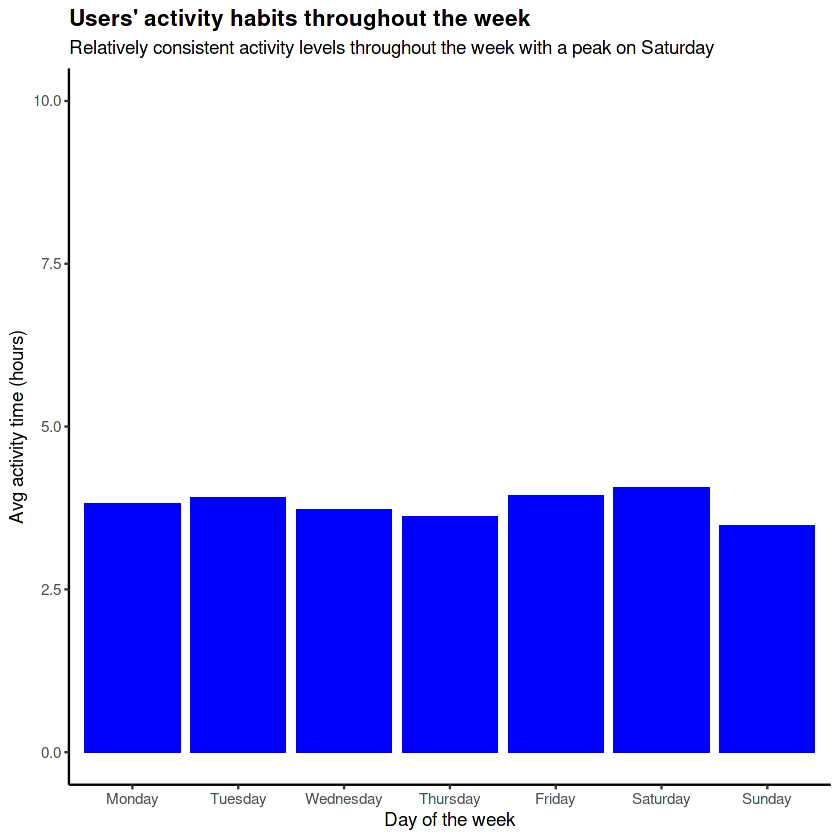

In [20]:
activity_by_day$DayofWeek <- factor(activity_by_day$DayofWeek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

activity_by_day_summary <- activity_by_day %>%
  group_by(DayofWeek) %>%
  summarize(avg_daily_steps = mean(TotalSteps), avg_daily_distance = mean(TotalDistance), avg_sedentary_time = mean(TotalSedentaryHours), avg_active_time = mean(TotalActiveHours))

ggplot(activity_by_day_summary, aes(x = DayofWeek, y = avg_active_time)) +
         geom_bar(position = "dodge", stat = "identity", fill = "Blue") +
  ylim(0, 10) +
  theme_classic() +
  labs(title = "Users' activity habits throughout the week", subtitle = "Relatively consistent activity levels throughout the week with a peak on Saturday", x = "Day of the week", y = "Avg activity time (hours)") +
  theme(plot.title = element_text(face = "bold"))

The visualization tells us that the users are quiet active throughout the weeks with slight peak at saturdays. Let's explore more to know at what hours the users are usally quiet active in a day.


In [21]:
# Summary of avg activity by time of day
hourly_activity_summary <- hourly_activity_cleaned %>%
  group_by(Time) %>%
  summarize(avg_step = mean(StepTotal), avg_calories = mean(Calories))

# Observing activity levels throughout the day
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [22]:
hourly_activity_summary2 <- melt(hourly_activity_summary, id.var = "Time")

library(hms)


Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms




### Lets visualize the daily pattern

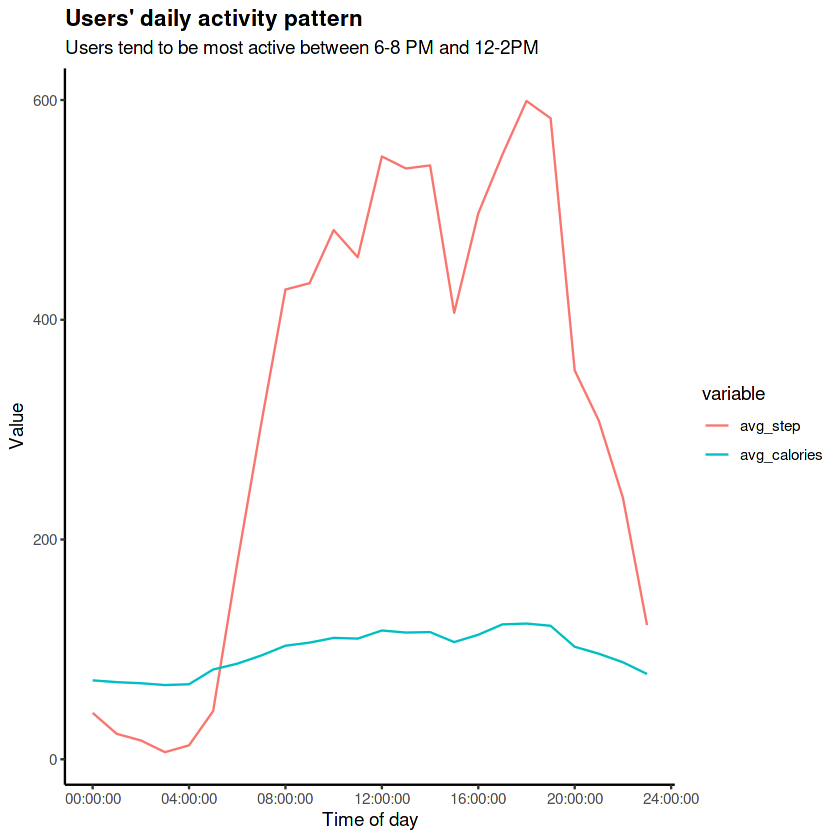

In [23]:
hourly_activity_summary2$Time <- as_hms(hourly_activity_summary2$Time)

ggplot(hourly_activity_summary2, aes(x = Time, y = value, color = variable)) +
  geom_line() +
  theme_classic() +
  labs(title = "Users' daily activity pattern", subtitle = "Users tend to be most active between 6-8 PM and 12-2PM", x = "Time of day", y = "Value") +
  theme(plot.title = element_text(face = "bold"))

> **Users’ activity levels can be seen by their average steps and average calories expended throughout the day. Based on the chart, it can be seen that users tend to most active based on their steps between 5-7 PM and 12-2 PM. This may suggest either that users prefer to be active during these times or that these are the times when they are able to be active, for example if they are professionals. However, due to the limited number of sampled user base, a follow up analysis with more users will need to be conducted to gain a better understanding of their activity patterns throughout the day.
> Despite the limited sampled user base, we will look at the aggregate average daily steps and daily calories to get a snapshot of how active the users are.**

In [24]:
# Aggregate of daily steps
steps_summarized <- daily_steps %>%
  group_by(Id) %>%
  summarize(avg_steps = mean(StepTotal))

#Aggregate of daily calories
calories_summarized <- daily_calories %>%
  group_by(Id) %>%
  summarize(avg_calories = mean(Calories))

# Combining aggregate steps and calories
daily_activity_summarized <- merge(steps_summarized, calories_summarized, by = "Id")

# Statistical summary of daily activity
daily_activity_summarized %>%
  summarize(avg_daily_steps = mean(avg_steps), avg_daily_calories = mean(avg_calories))

avg_daily_steps,avg_daily_calories
<dbl>,<dbl>
7519.273,2282.444


Based on the data, the sampled users have an average of around 7,500 daily steps and expend around 2,282 daily calories. As a reference, according to Healthline an average adult’s daily steps “ranges from 7,500 to 9,999 steps per day” and “a sedentary woman aged 19 to 30 burns 1,800 to 2,000 calories daily, while a sedentary woman aged 31 to 51 burns about 1,800 calories per day”. 
Lastly, another health aspect worth looking into is the sleep habits of users.

In [25]:
# Aggregate mean of sleep habit for all users
sleep_summary %>%
  summarize(avg_sleep = mean(avg_sleep_hrs), avg_time_in_bed = mean(avg_hrs_in_bed))

avg_sleep,avg_time_in_bed
<dbl>,<dbl>
6.294125,7.001599


#### Based on the data, the sampled users sleep for an average of 6 hours which is a little less than the recommended sleep time stated by the National Sleep Foundation where young adults between 18-25 years old and adults between 26-64 years old should sleep for 7-9 hours every night. Sleep patterns are important to analyze because it is a key health metric and getting enough sleep will help improve overall health.

Let's see is there any correlation between sleep and activity.
With the available data, we will look at the correlation between sleep duration and activity levels in the sampled user base.

`geom_smooth()` using formula 'y ~ x'



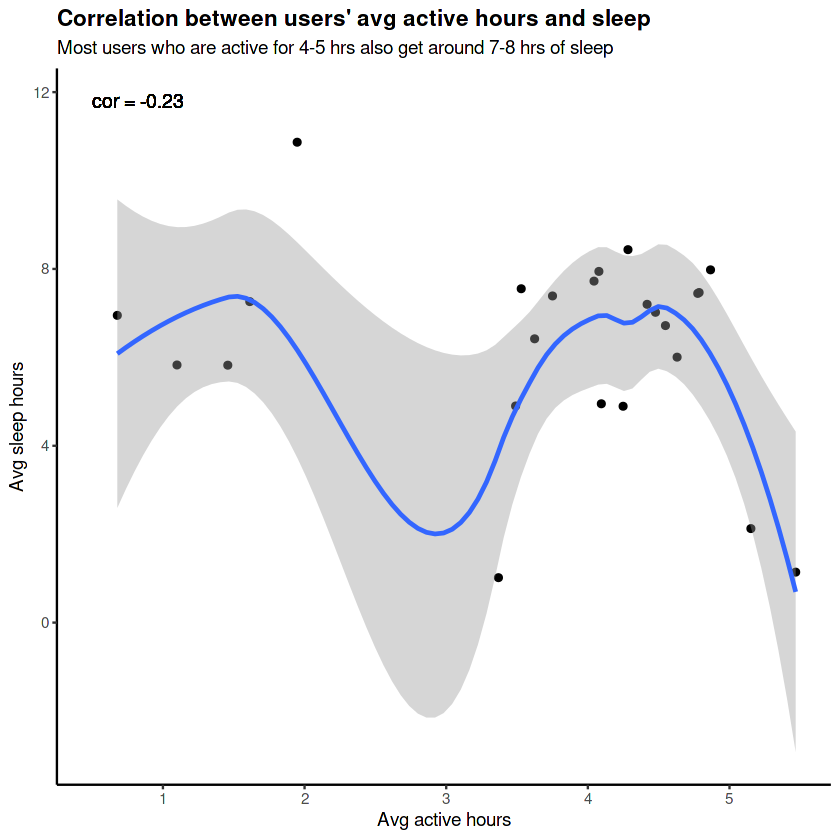

In [26]:
# Observing correlation between avg activity levels and sleep
activity_summary2 <- activity_summary %>%
  select(Id, avg_active_hrs, avg_sedentary_hrs)

activity_vs_sleep <- merge(activity_summary2, sleep_summary, by = "Id")

ggplot(activity_vs_sleep, aes(x = avg_active_hrs, y = avg_sleep_hrs)) +
  geom_point() +
  geom_smooth(method = "loess") +
  geom_text(aes(x = 0.5, y = 11.8, label = "cor = -0.23"), size = 4, hjust = 0) +
  theme_classic() +
  labs(title = "Correlation between users' avg active hours and sleep", subtitle = "Most users who are active for 4-5 hrs also get around 7-8 hrs of sleep", x = "Avg active hours", y = "Avg sleep hours") +
  theme(plot.title = element_text(face = "bold"))

In [27]:
# Correlation coefficient test avg active hours vs sleep
cor.test(activity_vs_sleep$avg_active_hrs, activity_vs_sleep$avg_sleep_hrs, method = c("pearson", "kendall", "spearman"))


	Pearson's product-moment correlation

data:  activity_vs_sleep$avg_active_hrs and activity_vs_sleep$avg_sleep_hrs
t = -1.1109, df = 22, p-value = 0.2786
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5799489  0.1906510
sample estimates:
       cor 
-0.2304707 


Due to the limited data available, we are unable to see a clear correlation between users’ active hours and their sleep duration. What is observed from the data is that most users who are active for 4-5 hours also get around 7-8 hours of sleep. A follow up study with more user data should be conducted to better test this hypothesis since the correlation test for this data only resulted in a week -0.23 correlation coefficient.

Lastly, we will look at the correlation between average calories expended, indicating the level of activity throughout the day, and the sleep habits to see if we can see a clearer correlation between the two.

`geom_smooth()` using formula 'y ~ x'



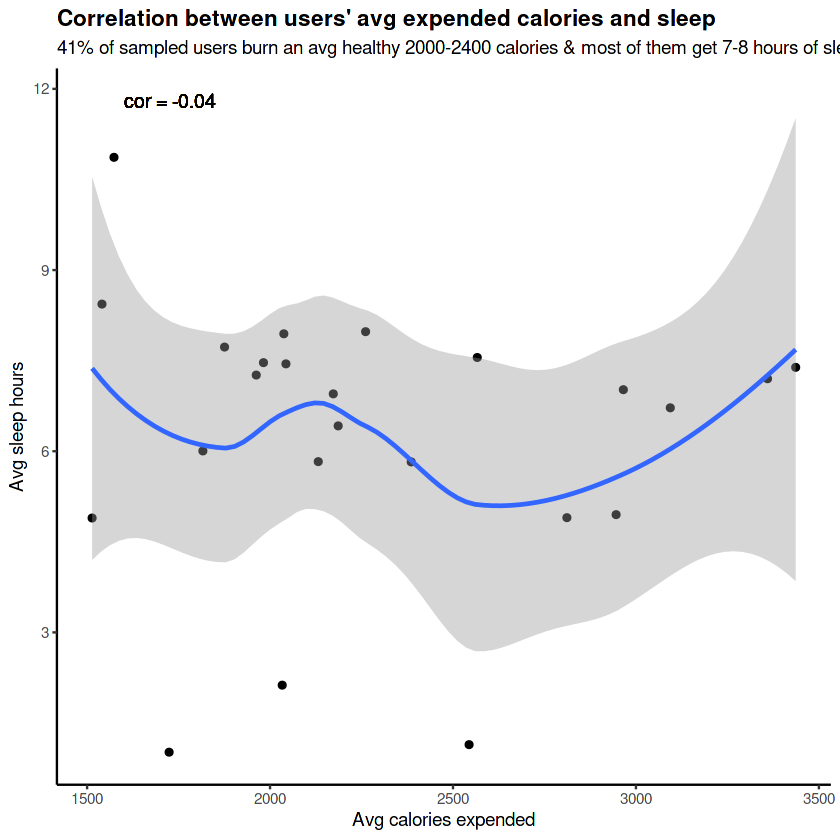

In [28]:
# Observing correlation between avg calories and sleep
calories_vs_sleep <- merge(calories_summarized, sleep_summary, by = "Id")

ggplot(calories_vs_sleep, aes(x = avg_calories, y = avg_sleep_hrs)) +
  geom_point() +
  geom_smooth(method = "loess") +
  geom_text(aes(x = 1600, y = 11.8, label = "cor = -0.04"), size = 4, hjust = 0) +
  theme_classic() +
  labs(title = "Correlation between users' avg expended calories and sleep", subtitle = "41% of sampled users burn an avg healthy 2000-2400 calories & most of them get 7-8 hours of sleep", x = "Avg calories expended", y = "Avg sleep hours") +
  theme(plot.title = element_text(face = "bold"))

Both the graph due to limited dataset, we could not see positive or negative relationship.Follow up studies with more user data should be done if we would like to test the hypothesis of the positive correlation between being more active and getting a better sleep duration.

# Step 6 : Key takeaways - ACT

* The sampled Bellabeat users show a consistent activity pattern throughout the week suggesting they already have a habitual lifestyle routine
* Sampled users tend to be most active between 12-2 PM and 5-7 PM during the day which may suggest that these are the most preferred time for users to be active or it is the most optimal time for them due to their lifestyles, such as their professional working hours.
* They also seem to be moderately healthy with an average daily step count of around 7,500 and an average daily expended calories of around 2,300. This may suggest that they are using Bellabeat in order to maintain their healthy habits
* Further follow up studies should be conducted with more user data to better understand how users use Bellabeat and their needs

## RECOMMENDATIONS

>**1. An example ad copy could be: “On average Bellabeat users take 7,500 steps per day compared to the national average of only 5,000 steps per day. Ready to start building healthy habits with Bellabeat?”**

>**2. Send user-targeted push notifications to remind them to do an activity around peak active times (12-2 PM and 5-7 PM) in order to encourage them to use Bellabeat more consistently**

>**3. Gamify the Bellabeat app to encourage more healthy habits, for example by encouraging more daily steps or more active minutes where users can set their own individual targets**

# 